<a href="https://colab.research.google.com/github/HazenDeveloper/Diabetic-Retinopathy-Feature-Extraction-using-Fundus-Images/blob/master/CNN_FE_SVM_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alhazen","key":"4227e507fcd658d877825607789e0a91"}'}

In [2]:
!pip install q kaggle

In [3]:
!mkdir dir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions list

401 - Unauthorized


In [4]:
import kaggle
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

100% 427M/427M [00:04<00:00, 108MB/s]
100% 427M/427M [00:04<00:00, 106MB/s]


In [5]:
!unzip diabetic-retinopathy-224x224-gaussian-filtered.zip

Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0684311afdfc.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0

In [ ]:
!kaggle kernels pull mahipalsingh/cnn-ml-classifier

Source code downloaded to /content/cnn-ml-classifier.ipynb


In [6]:
!ls

diabetic-retinopathy-224x224-gaussian-filtered.zip  kaggle.json
dir						    sample_data
gaussian_filtered_images			    train.csv


In [6]:
#!pip install imutils
import keras
import tensorflow as tf

import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd


In [ ]:
!ls

diabetic-retinopathy-224x224-gaussian-filtered.zip  kaggle.json
dir						    sample_data
gaussian_filtered_images			    train.csv


In [7]:
from os import listdir, walk
from os.path import isfile, join

path = os.path.join(os.path.curdir,'gaussian_filtered_images')
imagePaths = list(paths.list_images(path))

In [8]:
data = []
labels = []
width,height=150,150

imagePaths = list(paths.list_images('./gaussian_filtered_images/gaussian_filtered_images'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    #print(imagePath)
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# le = LabelEncoder()
# labels = le.fit_transform(labels)

# ohe = OneHotEncoder()
# labels = ohe.fit_transform(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 150, 150, 3)
(3662, 5)


In [9]:
test_ratio = 0.2

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 150, 150, 3)
Test images: (733, 150, 150, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [11]:
x_train.shape

(2929, 150, 150, 3)

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)

In [ ]:
models, _ = clf.fit(x_train, x_test, y_train, y_test)
print(models)

ValueError: ignored

In [11]:
INIT_LR = 1e-3
EPOCHS = 100
BS = 32

from keras.optimizers import gradient_descent_legacy

cnn_model=Sequential()

cnn_model.add(Conv2D(16, (5, 5),activation='relu',input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(32, (5, 5),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, (5, 5), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

# cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.2))

cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())   #Features Are Extracted From this Layer
# cnn_model.add(Dropout(0.2))

# cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(5, activation='sigmoid'))

# opt = Adam(learning_rate=INIT_LR)
opt = gradient_descent_legacy.SGD (learning_rate = INIT_LR)
cnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 73, 73, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 69, 69, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 34, 34, 32)       

In [21]:
# Specify the path where you want to save the best model
checkpoint_path = 'best_model.h5'

# Create the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    patience = 2,
    monitor='val_accuracy',       # Metric to monitor (could also be 'val_accuracy', etc.)
    save_best_only=True,      # Saves only the best model based on the monitored metric
    # save_weights_only=False,  # Set to True to save only the model's weights, not the whole model
    verbose=1                 # Verbosity level: 0 - silent, 1 - progress bar, 2 - one line per epoch.
)
# checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='auto')
my_callbacks = [model_checkpoint]

In [22]:
# train the head of the network
print("[INFO] training head..")
print(x_train.shape, y_train.shape)
h = cnn_model.fit(x_train,y_train,epochs=EPOCHS, validation_split=0.2, callbacks=my_callbacks)
print("Done !!")

[INFO] training head..
(2929, 150, 150, 3) (2929, 5)
Epoch 1/100
73/74 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.7783
Epoch 1: val_accuracy improved from -inf to 0.72184, saving model to best_model.h5
74/74 [==============================] - 3s 39ms/step - loss: 0.2109 - accuracy: 0.7776 - val_loss: 0.2566 - val_accuracy: 0.7218
Epoch 2/100
74/74 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.7755
Epoch 2: val_accuracy improved from 0.72184 to 0.72696, saving model to best_model.h5
74/74 [==============================] - 2s 28ms/step - loss: 0.2125 - accuracy: 0.7755 - val_loss: 0.2484 - val_accuracy: 0.7270
Epoch 3/100
73/74 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.7757
Epoch 3: val_accuracy improved from 0.72696 to 0.73720, saving model to best_model.h5
74/74 [==============================] - 2s 28ms/step - loss: 0.2120 - accuracy: 0.7755 - val_loss: 0.2487 - val_accuracy: 0.7372
Epoch 4/100
73/74

In [15]:
!pip install scikit-plot

[INFO] evaluating network...
92/92 [==============================] - 1s 8ms/step

Trainig Accuracy Score:- 79.7200409696142

Testing Accuracy Score:- 75.03410641200546

Traning Graph:- 
 


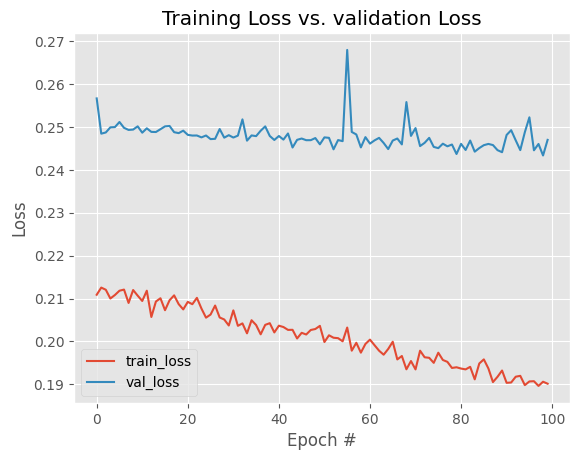

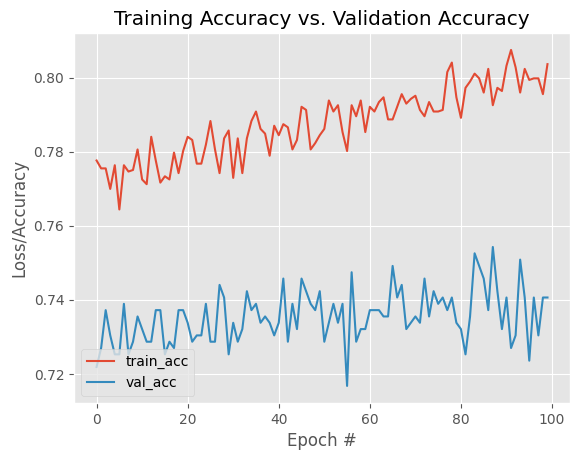

In [23]:
#!pip install scikit-plot
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
import tensorflow

cnn_model = tensorflow.keras.models.load_model('best_model.h5')

print("[INFO] evaluating network...")
predIdxs = cnn_model.predict(x_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = cnn_model.predict(x_train, batch_size=BS)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainCNNScore=accuracy_score(trainpredIdxs,y_train.argmax(axis=1))*100
CNNScore=accuracy_score(predIdxs,y_test.argmax(axis=1))*100

print("\nTrainig Accuracy Score:-",trainCNNScore)
print("\nTesting Accuracy Score:-",CNNScore)
print("\nTraning Graph:- \n ")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
plt.title("Training Loss vs. validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left",)
plt.show()

plt.figure()
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy vs. Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

In [ ]:
extractCNN = Model(cnn_model.inputs, cnn_model.layers[-4].output)

#del(data)
#del(labels)
feat_trainCNN  = extractCNN.predict(x_train)
feat_testCNN = extractCNN.predict(x_test)

print(feat_trainCNN.shape)

29/29 [==============================] - 0s 6ms/step
(2746, 1024)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainSVMScoreCNN=svm.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

TestSVMScoreCNN=svm.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)

SVM Training Accuracy Score:- 99.38091769847051

SVM Testing Accuracy Score:- 72.16157205240175


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainDecisionScoreCNN=clf.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScoreCNN)


TestDecisionScoreCNN=clf.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScoreCNN)

Decision Tree Training Accuracy Score:- 99.38091769847051

Decision Tree Testing Accuracy Score:- 65.06550218340611


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainKNNScoreCNN=knn.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScoreCNN)

TestKNNScoreCNN=knn.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScoreCNN)

KNN Training Accuracy Score:- 88.20101966496723

KNN Testing Accuracy Score:- 72.37991266375546


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainNBScoreCNN=gnb.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",TrainNBScoreCNN)

TestNBScoreCNN=gnb.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",TestNBScoreCNN)


GaussianNaive Bayes Training Accuracy Score:- 29.24253459577567

GaussianNaive Bayes Testing Accuracy Score:- 27.074235807860266
